In [27]:
# %load init.py
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
import dill
#df = pd.read_csv('../data/complaints.csv')
#dill.dump_session('read_data.db')  # so that I don't have to parse the csv every time
dill.load_session('read_data.db')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517620 entries, 0 to 1517619
Data columns (total 18 columns):
Date received                   1517620 non-null object
Product                         1517620 non-null object
Sub-product                     1282455 non-null object
Issue                           1517620 non-null object
Sub-issue                       957685 non-null object
Consumer complaint narrative    499118 non-null object
Company public response         572138 non-null object
Company                         1517620 non-null object
State                           1492059 non-null object
ZIP code                        1374900 non-null object
Tags                            206318 non-null object
Consumer consent provided?      898083 non-null object
Submitted via                   1517620 non-null object
Date sent to company            1517620 non-null object
Company response to consumer    1517619 non-null object
Timely response?                1517620 non-null obj

In [29]:
dfreduced = pd.DataFrame()
dfreduced['Company'] = df['Company']
dfreduced['Responsive'] = df['Timely response?']
dfreduced

,Company,Responsive
0,TRANSWORLD SYSTEMS INC,Yes
1,Experian Information Solutions Inc.,Yes
2,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Yes
3,"Diversified Consultants, Inc.",Yes
4,HYUNDAI CAPITAL AMERICA,Yes
...,...,...
1517615,NISSAN MOTOR ACCEPTANCE CORPORATION,Yes
1517616,"CMRE Financial Services, Inc.",Yes
1517617,Finance of America Mortgage LLC,Yes
1517618,JPMORGAN CHASE & CO.,Yes


In [30]:
nTop = 20
dfg = dfreduced.groupby(['Company']).count()[['Responsive']].sort_values('Responsive', ascending=False)
dfg = dfg.reset_index()
dfgTop = dfg.head(nTop)
dfgTop

,Company,Responsive
0,"EQUIFAX, INC.",152828
1,Experian Information Solutions Inc.,135725
2,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",132287
3,"BANK OF AMERICA, NATIONAL ASSOCIATION",88680
4,WELLS FARGO & COMPANY,76625
5,JPMORGAN CHASE & CO.,66665
6,"CITIBANK, N.A.",54764
7,CAPITAL ONE FINANCIAL CORPORATION,41312
8,"Navient Solutions, LLC.",31845
9,Ocwen Financial Corporation,29265


In [31]:
dfreducedTop = dfreduced.loc[dfreduced['Company'].isin(dfgTop['Company'])]
dfreducedTop

,Company,Responsive
1,Experian Information Solutions Inc.,Yes
2,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Yes
5,TD BANK US HOLDING COMPANY,Yes
7,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Yes
11,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Yes
...,...,...
1517608,"CITIBANK, N.A.",Yes
1517612,"CITIBANK, N.A.",Yes
1517614,"Navient Solutions, LLC.",Yes
1517618,JPMORGAN CHASE & CO.,Yes


In [32]:
dfreducedOther = dfreduced.loc[dfreduced['Company'].isin(dfgTop['Company']) == False]
dfreducedOther = dfreducedOther.assign(Company = 'Other') # any bank that is not in the top
dfreducedOther

,Company,Responsive
0,Other,Yes
3,Other,Yes
4,Other,Yes
6,Other,Yes
8,Other,Yes
...,...,...
1517611,Other,Yes
1517613,Other,Yes
1517615,Other,Yes
1517616,Other,Yes


In [33]:
dfA = dfreducedTop.append(dfreducedOther) 
dfA

,Company,Responsive
1,Experian Information Solutions Inc.,Yes
2,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Yes
5,TD BANK US HOLDING COMPANY,Yes
7,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Yes
11,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Yes
...,...,...
1517611,Other,Yes
1517613,Other,Yes
1517615,Other,Yes
1517616,Other,Yes


In [34]:
Ag = dfA.groupby(['Responsive','Company']).size()
Ag

Responsive  Company                               
No          AMERICAN EXPRESS COMPANY                       2
            BANK OF AMERICA, NATIONAL ASSOCIATION       1590
            CAPITAL ONE FINANCIAL CORPORATION             71
            CITIBANK, N.A.                               363
            DISCOVER BANK                                 15
            Ditech Financial LLC                          40
            ENCORE CAPITAL GROUP INC.                     24
            EQUIFAX, INC.                               1675
            Experian Information Solutions Inc.            8
            JPMORGAN CHASE & CO.                          96
            NATIONSTAR MORTGAGE                          129
            Navient Solutions, LLC.                        3
            Ocwen Financial Corporation                  543
            Other                                      27009
            PNC Bank N.A.                                110
            SYNCHRONY FINANCIAL   

In [35]:
dfAg = dfA.groupby(['Responsive','Company']).size().to_frame('Count').sort_values('Count', ascending=False)
dfAg = dfAg.reset_index()
dfAg

,Responsive,Company,Count
0,Yes,Other,521864
1,Yes,"EQUIFAX, INC.",151153
2,Yes,Experian Information Solutions Inc.,135717
3,Yes,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",132192
4,Yes,"BANK OF AMERICA, NATIONAL ASSOCIATION",87090
5,Yes,WELLS FARGO & COMPANY,72928
6,Yes,JPMORGAN CHASE & CO.,66569
7,Yes,"CITIBANK, N.A.",54401
8,Yes,CAPITAL ONE FINANCIAL CORPORATION,41241
9,Yes,"Navient Solutions, LLC.",31842


In [36]:
dfAgPivot = dfAg.pivot(index='Responsive',columns='Company',values='Count')
dfAgPivot

Company,AMERICAN EXPRESS COMPANY,"BANK OF AMERICA, NATIONAL ASSOCIATION",CAPITAL ONE FINANCIAL CORPORATION,"CITIBANK, N.A.",DISCOVER BANK,Ditech Financial LLC,ENCORE CAPITAL GROUP INC.,"EQUIFAX, INC.",Experian Information Solutions Inc.,JPMORGAN CHASE & CO.,...,"Navient Solutions, LLC.",Ocwen Financial Corporation,Other,PNC Bank N.A.,PORTFOLIO RECOVERY ASSOCIATES INC,SYNCHRONY FINANCIAL,TD BANK US HOLDING COMPANY,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",U.S. BANCORP,WELLS FARGO & COMPANY
Responsive,,,,,,,,,,,,,,,,,,,,,
No,2.0,1590.0,71.0,363.0,15.0,40.0,24.0,1675.0,8.0,96.0,...,3.0,543.0,27009.0,110.0,NaN,17.0,9.0,95.0,92.0,3697.0
Yes,15962.0,87090.0,41241.0,54401.0,12141.0,14727.0,12772.0,151153.0,135717.0,66569.0,...,31842.0,28722.0,521864.0,12883.0,12148.0,25565.0,11266.0,132192.0,19134.0,72928.0


In [39]:
dfAgPivotSort = dfAgPivot.sort_values(dfAgPivot.first_valid_index(), axis=1)
dfAgPivotSort

Company,AMERICAN EXPRESS COMPANY,"Navient Solutions, LLC.",Experian Information Solutions Inc.,TD BANK US HOLDING COMPANY,DISCOVER BANK,SYNCHRONY FINANCIAL,ENCORE CAPITAL GROUP INC.,Ditech Financial LLC,CAPITAL ONE FINANCIAL CORPORATION,U.S. BANCORP,...,JPMORGAN CHASE & CO.,PNC Bank N.A.,NATIONSTAR MORTGAGE,"CITIBANK, N.A.",Ocwen Financial Corporation,"BANK OF AMERICA, NATIONAL ASSOCIATION","EQUIFAX, INC.",WELLS FARGO & COMPANY,Other,PORTFOLIO RECOVERY ASSOCIATES INC
Responsive,,,,,,,,,,,,,,,,,,,,,
No,2.0,3.0,8.0,9.0,15.0,17.0,24.0,40.0,71.0,92.0,...,96.0,110.0,129.0,363.0,543.0,1590.0,1675.0,3697.0,27009.0,NaN
Yes,15962.0,31842.0,135717.0,11266.0,12141.0,25565.0,12772.0,14727.0,41241.0,19134.0,...,66569.0,12883.0,21715.0,54401.0,28722.0,87090.0,151153.0,72928.0,521864.0,12148.0


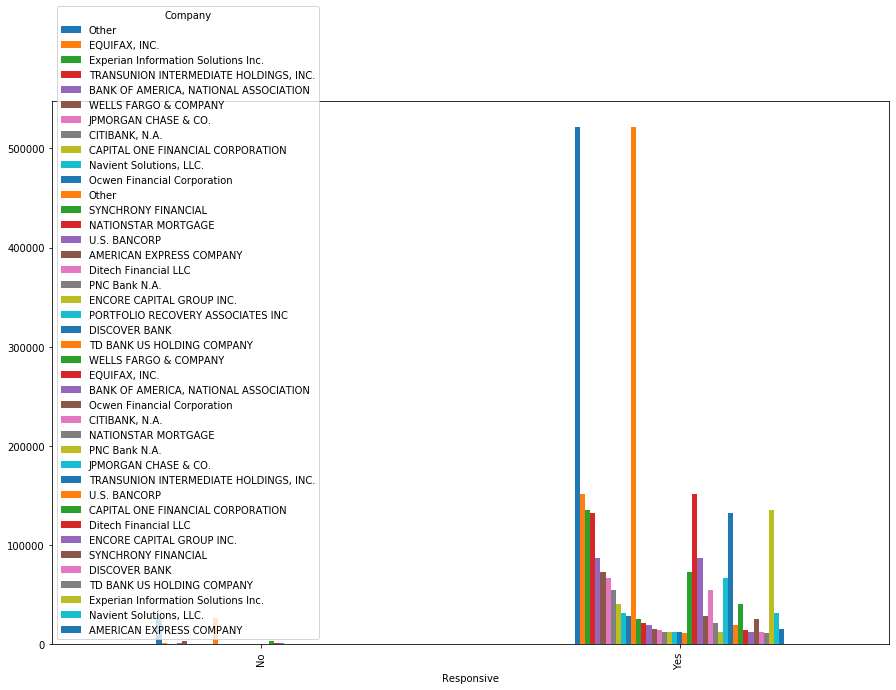

In [43]:
#ax = plt.gca()
#ax.legend().set_visible(False)
dfAgPivotSort.loc[:,dfAg['Company']].plot.bar(stacked=False, figsize=(15,10))